<a href="https://colab.research.google.com/github/ParkEunbin/ML_basic/blob/main/210127_FlattenLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 분류기

**데이터와 차원**
- "차원" : 표의 열 관계 sv 포함관계
- 표의 열 관점 : 표의 칼럼의 갯수 = N차원 공간의 한 점 /변수의 개수= 공간의 차원수 
- 포함관계 : 배열의 깊이 = 차원수 

**이미지**
- 2차원 형태로 생김 

**데이터 공간의 맥락:** 차원수=변수의 갯수
**데이터 형태의 맥락:** 차원수=배열의 깊이


# 이미지 데이터
**Mnist**
- 흑백 숫자 데이터 (28,28)>>284개의 숫자데이터
- 2차원 형태, 284차원 공간의 한 점
- tf.keras.datasets.mnist

**CIFAR10**
- 컬러 이미지 데이터(32,32)집합이 3개(빨,초,파) 존재>> (32,32,3)
- 3차원 형태, 3072차원 공간의 한 점
-tf.keras.datasets.cifar10

In [1]:
import tensorflow as tf

In [3]:
(mnist_x,mnist_y),_=tf.keras.datasets.mnist.load_data()
print(mnist_x.shape,mnist_y.shape)

(cifar_x,cifar_y),_=tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape,cifar_y.shape)

(60000, 28, 28) (60000,)
(50000, 32, 32, 3) (50000, 1)


## 1. 화면 출력


[5 0 4 1 9 2 1 3 1 4]


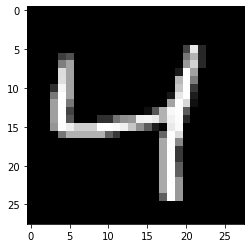

In [7]:
print (mnist_y[0:10])
import matplotlib.pyplot as plt
plt.imshow(mnist_x[2],cmap='gray')

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


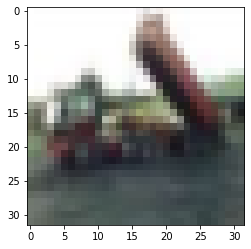

In [8]:
print (cifar_y[0:10])
import matplotlib.pyplot as plt
plt.imshow(cifar_x[2])

##2.차원 확인

In [10]:
import numpy as np

d1=np.array([1,2,3,4,5])
print(d1.shape)

d2=np.array([d1,d1,d1,d1])
print(d2.shape)

d3= np.array([d2,d2,d2])
print(d3.shape)

(5,)
(4, 5)
(3, 4, 5)


In [12]:
print(mnist_y.shape) # 1차원 형태
print(cifar_y.shape) # 2차원 형태 

(60000,)
(50000, 1)


# Flatten Layer를 이용한 이미지 학습
- reshape : (60000,28,28)>(60000,784) > 표학습과 동일하게 학습하면 됨!
- 가중치 : 가중치가 높음> 해당 픽셀값이 중요하다는 의미
- 84 개의 Hidden layer :컴퓨터가 학습하기에 가장 좋은 특징 84개를 인공신경망이 찾은 것.
- reshape 대신 flatten을 사용할 거임! (60000,28,28) > 입력의 모양과 FlattenㅣLayer를 사용

In [13]:
import tensorflow as tf
import pandas as pd

### with reshape

In [14]:
# 데이터 준비
(독립,종속),_=tf.keras.datasets.mnist.load_data()
print(독립.shape,종속.shape)


(60000, 28, 28) (60000,)


In [16]:
#reshape해주기 + 원핫 인코딩
독립=독립.reshape(60000,784)
종속=pd.get_dummies(종속)
print(독립.shape,종속.shape)

(60000, 784) (60000, 10)


In [21]:
# 모델 만들기
X= tf.keras.layers.Input(shape=[784])
H=tf.keras.layers.Dense(84,activation='swish')(X)
Y=tf.keras.layers.Dense(10,activation='softmax')(H)
model=tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [22]:
# 모델 학습
model.fit(독립,종속,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 6.6584 - accuracy: 0.7705
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5426 - accuracy: 0.9083
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4731 - accuracy: 0.9232
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4261 - accuracy: 0.9297
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3912 - accuracy: 0.9375
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3894 - accuracy: 0.9378
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3847 - accuracy: 0.9393
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3571 - accuracy: 0.9438
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3640 - accuracy: 0.9454
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.359

In [23]:
#모델 이용하기
pred= model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


### with Flatten

In [25]:
# 데이터 준비
(독립,종속),_=tf.keras.datasets.mnist.load_data()
print(독립.shape,종속.shape)

#reshape해주기 + 원핫 인코딩
#독립=독립.reshape(60000,784)
종속=pd.get_dummies(종속)
print(독립.shape,종속.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000, 10)


In [26]:
# 모델 만들기
X= tf.keras.layers.Input(shape=[28,28])
H=tf.keras.layers.Flatten()(X) #알아서 한줄로 펴줌
H=tf.keras.layers.Dense(84,activation='swish')(H) #84개의 특징을 컴터가 스스로 찾은 값
Y=tf.keras.layers.Dense(10,activation='softmax')(H)
model=tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [27]:
# 모델 학습
model.fit(독립,종속,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 6.9691 - accuracy: 0.7982
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5361 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4554 - accuracy: 0.9284
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4317 - accuracy: 0.9355
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3993 - accuracy: 0.9391
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.9429
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3719 - accuracy: 0.9434
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.9458
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3624 - accuracy: 0.9498
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.350

In [28]:
#모델 이용하기
pred= model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
